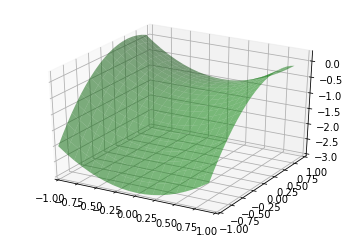

In [4]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

import matplotlib.pyplot as plt

x0 = np.arange(-1, 1, 1/10.)
x1 = np.arange(-1, 1, 1/10.)
x0, x1 = np.meshgrid(x0, x1)
y_truth = x0**2 - x1**2 + x1 - 1

ax = plt.figure().gca(projection='3d')
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
surf = ax.plot_surface(x0, x1, y_truth, rstride=1, cstride=1,
                       color='green', alpha=0.5)
plt.show()


In [11]:
from sklearn.utils import check_random_state
rng = check_random_state(0)

# Training samples
X_train = rng.uniform(-1, 1, 100).reshape(50, 2)
y_train = X_train[:, 0]**2 - X_train[:, 1]**2 + X_train[:, 1] - 1

# Testing samples
X_test = rng.uniform(-1, 1, 100).reshape(50, 2)
y_test = X_test[:, 0]**2 - X_test[:, 1]**2 + X_test[:, 1] - 1

In [14]:
from gplearn.genetic import SymbolicRegressor

est_gp = SymbolicRegressor(population_size=5000,
                           generations=20, stopping_criteria=0.01,
                           p_crossover=0.7, p_subtree_mutation=0.1,
                           p_hoist_mutation=0.05, p_point_mutation=0.1,
                           max_samples=0.9, verbose=1,
                           parsimony_coefficient=0.01, random_state=0)
est_gp.fit(X_train, y_train)

    |    Population Average   |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    38.13 458.5776815199198        5 0.32066597282800713 0.5567635392738037      3.27m
   1     9.97 1.7023272312922468        5 0.32020176152302043 0.6247871480420513      4.42m
   2     7.72 1.9445634467449862       11 0.239536660153891 0.5331481804892064      4.46m
   3     5.41 0.9901568154685098        7 0.23567634944637403 0.7199062580514382      4.12m
   4     4.66 0.8944433636161079       11 0.10394641358876243 0.10394641358876248      3.77m
   5     5.41 0.94024238040472       11 0.06080204042764769 0.06080204042764772      3.58m
   6     6.78 1.0953592564049093       11 0.0007814740353455652 0.0007814740353455751      3.54m


SymbolicRegressor(const_range=(-1.0, 1.0),
         function_set=('add', 'sub', 'mul', 'div'), generations=20,
         init_depth=(2, 6), init_method='half and half', max_samples=0.9,
         metric='mean absolute error', n_jobs=1, p_crossover=0.7,
         p_hoist_mutation=0.05, p_point_mutation=0.1, p_point_replace=0.05,
         p_subtree_mutation=0.1, parsimony_coefficient=0.01,
         population_size=5000, random_state=0, stopping_criteria=0.01,
         tournament_size=20, verbose=1, warm_start=False)

In [17]:
print(est_gp._program)

sub(add(-0.999, X1), mul(sub(X1, X0), add(X0, X1)))
